In [35]:
import pandas as pd

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
import numpy as np

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

In [40]:
df = pd.read_csv('./data/train.csv')

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Матрица пропущенных значений')

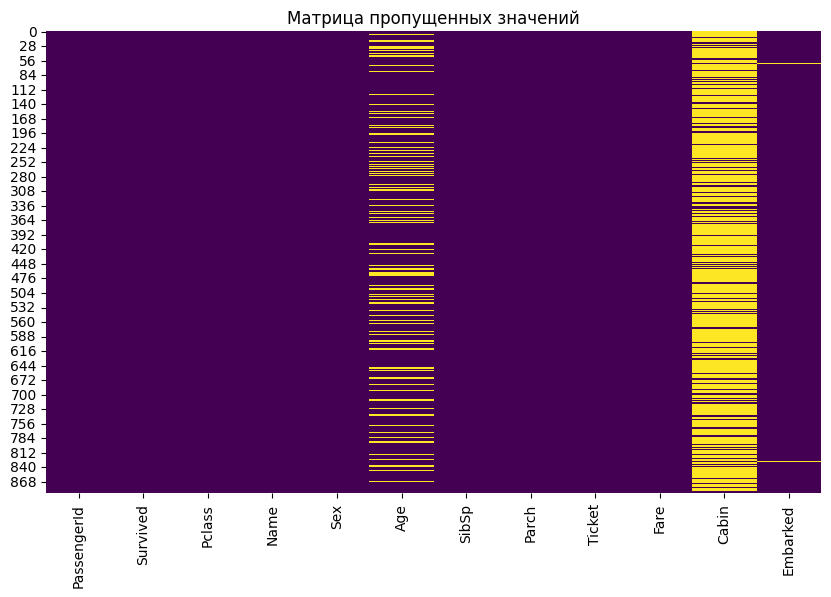

In [42]:
# выводим матрицу пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Матрица пропущенных значений')

In [43]:
# В пирзнаке возраст пропущено не так много значений, его можно заполнить средним
df.Age = df.Age.fillna(df.Age.mean())

In [44]:
# В признаке Cabin пропущено много и нет оригинальной идеи, как эти значения можно заполнить, этот признак проще удалить
df = df.drop(columns=["Cabin"])

In [45]:
# В признаке Embarked пропущено совсем мало значений, его можно заполнить самым частым и наиболее вероятным
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/tmp/ipykernel_27859/357331797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [46]:

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
classes_list = ["Not survived", "Survived"]

Classes conts on train: [444. 268.]
Class diff counts: [  0. 176.]


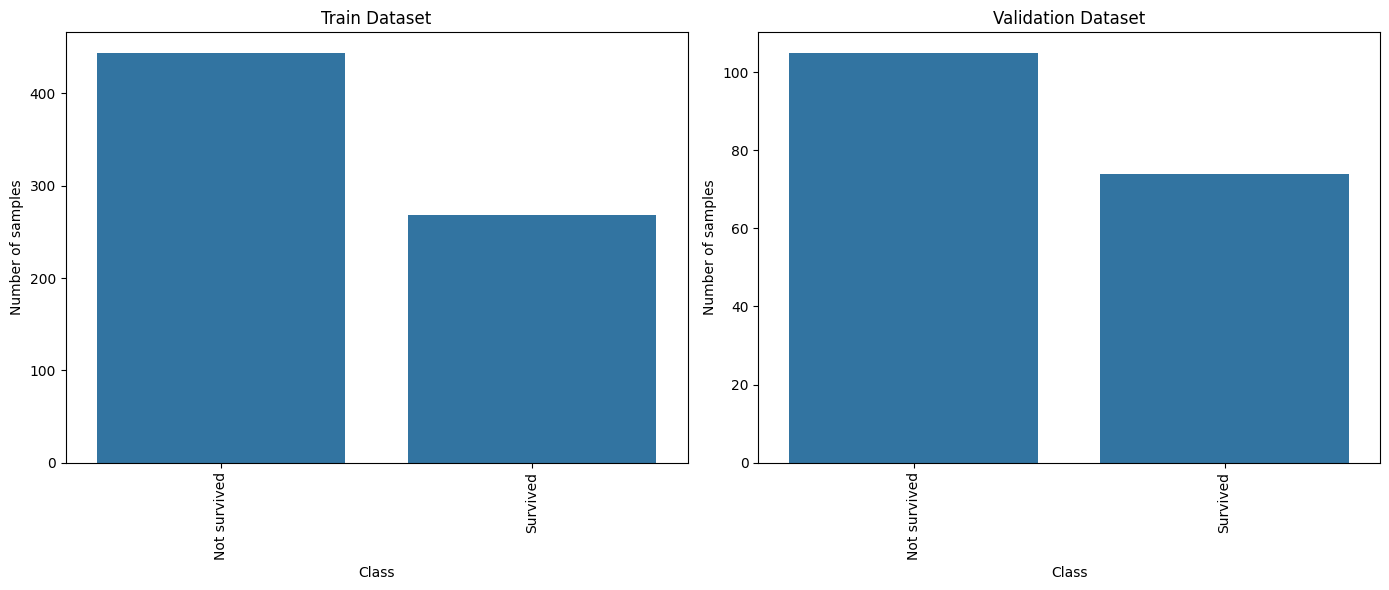

In [48]:
# Подсчитать количество изображений в каждом классе для обучающего набора данных
train_class_counts = np.zeros(2)
for idx, row in train_df.iterrows():
    label = row['Survived']
    train_class_counts[label] += 1
    
print(f"Classes conts on train: {train_class_counts}")
print(f"Class diff counts: {np.max(train_class_counts) - train_class_counts}")

# Подсчитать количество изображений в каждом классе для валидационного набора данных
val_class_counts = np.zeros(2)
for idx, row in val_df.iterrows():
    label = row['Survived']
    val_class_counts[label] += 1

# Создать barplot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Barplot для обучающего набора данных
sns.barplot(x=classes_list, y=train_class_counts, ax=ax[0])
ax[0].set_title('Train Dataset')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of samples')
ax[0].tick_params(axis='x', rotation=90)

# Barplot для валидационного набора данных
sns.barplot(x=classes_list, y=val_class_counts, ax=ax[1])
ax[1].set_title('Validation Dataset')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of samples')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [49]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [53]:
# Инициализация MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Применение бинаризации
Embarked_encoding = mlb.fit_transform(df['Embarked'])

# Создание DataFrame с закодированными признаками
Embarked_df = pd.DataFrame(Embarked_encoding, columns=mlb.classes_)

# Объединение закодированных признаков с исходным DataFrame
df = pd.concat([df.drop('Embarked', axis=1), Embarked_df], axis=1)

In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1,0,0
